In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [15]:
df = pd.read_csv("Tweets.csv")
df.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [16]:
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))
df['char_count'] = df['text'].astype(str).apply(lambda x: sum(len(word) for word in x.split()))

df[['text', 'text_length', 'word_count', 'char_count']].head()


,text,text_length,word_count,char_count
0,"I`d have responded, if I were going",36,7,29
1,Sooo SAD I will miss you here in San Diego!!!,46,10,36
2,my boss is bullying me...,25,5,21
3,what interview! leave me alone,31,5,26
4,"Sons of ****, why couldn`t they put them on t...",75,14,61


In [17]:
X = df[['text_length', 'word_count', 'char_count']]
y = df['sentiment'].astype('category').cat.codes

X.head(), y.head()


(   text_length  word_count  char_count
 0           36           7          29
 1           46          10          36
 2           25           5          21
 3           31           5          26
 4           75          14          61,
 0    1
 1    0
 2    0
 3    0
 4    0
 dtype: int8)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (21984, 3)
Testing set size: (5497, 3)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [20]:
y_pred = model.predict(X_test)
print("First 10 Predictions:", y_pred[:10])


First 10 Predictions: [1.26191623 0.98535218 0.9571937  1.00823925 0.98879324 1.05248441
 0.94646562 1.08943709 0.98074718 1.01149506]


In [21]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))


Mean Absolute Error (MAE): 0.607
Root Mean Squared Error (RMSE): 0.765


In [22]:
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': np.round(y_pred[:10], 2)
})
comparison


,Actual,Predicted
0,2,1.26
1,1,0.99
2,1,0.96
3,0,1.01
4,2,0.99
5,1,1.05
6,0,0.95
7,2,1.09
8,0,0.98
9,1,1.01


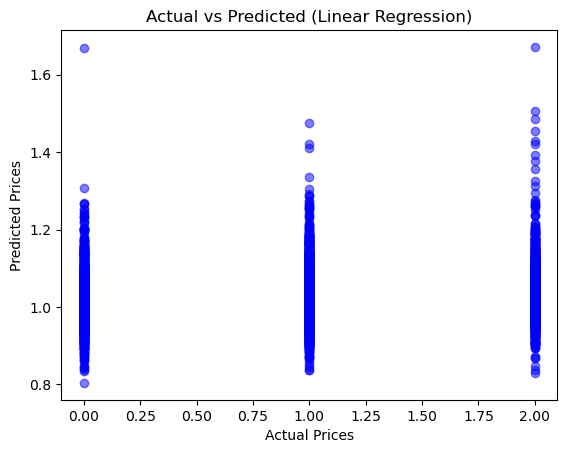

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()
